## Systems "in control" and "out of control".
Mathematically control is all about the poles.  If the real part of all the poles are on the left hand side of the complex plane (less than zero), then the system is in control.  The system can be in control even if the poles are complex, as long as the real part is less than zero.  A system is out of control if any pole has a real part that is equal to or greater than zero.

## What does being in control really mean?

A system is in control if you input a step function and the system's output eventually settles to a constant value.  (Sometimes an underdamped system can take "too long" to settle to a constant value and this situation informally known as being out of control.) 

## Example 3 system in control?
$H(s)=\frac{1}{s}-\frac{1}{s}e^{-s}$

 

<Axes: xlabel='Re(s)', ylabel='Im(s)'>

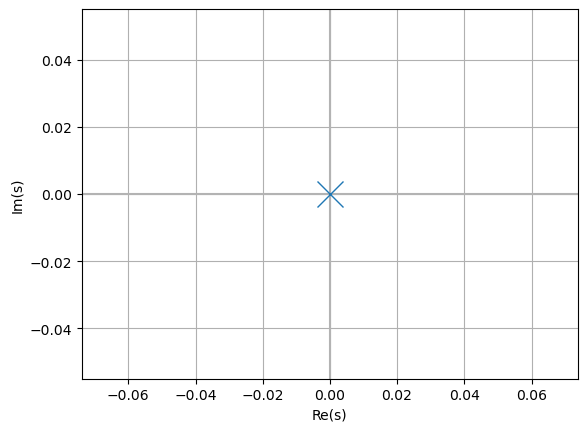

In [1]:
from lcapy import s, j, pi, f, transfer, j2pif,t,exp
import numpy as np
from matplotlib.pyplot import savefig
H=transfer(1/s-1/s*exp(-s)).simplify()
H.plot()



(<Axes: xlabel='$\\omega (r/s)$', ylabel='Magnitude(dB)'>,
 <Axes: xlabel='$\\omega (r/s)$', ylabel='Transfer function phase (radians)'>)

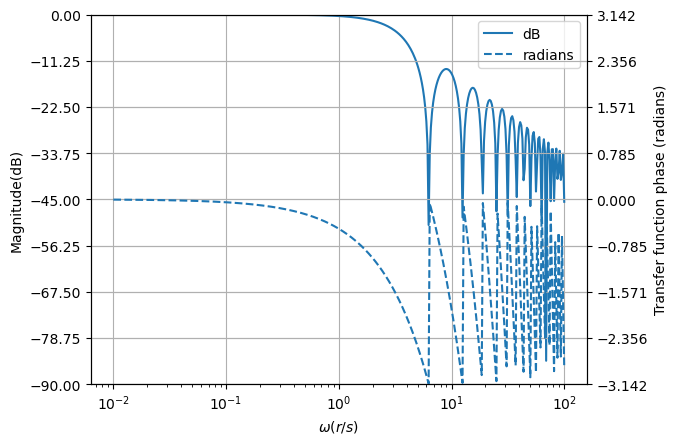

In [2]:
A = H.subs(j * f)
fv = np.logspace(-2, 2, 400)
A.plot(fv, log_frequency=True,ylabel="Magnitude(dB)",xlabel='$\omega (r/s)$')

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

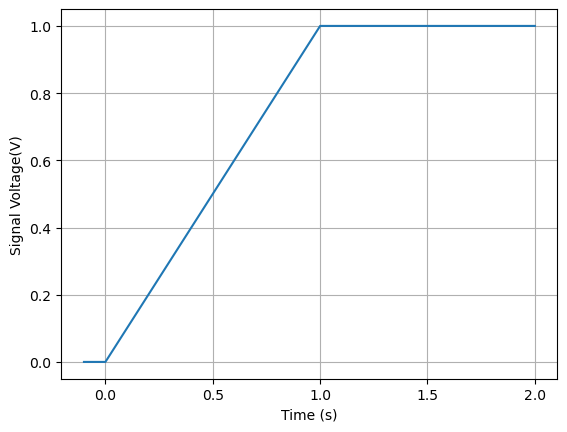

In [3]:
tv = np.linspace(-.1, 2, 400)
G=1/s 
F=H*G
ft=F(t, causal=True)
ft.plot(tv,ylabel='Signal Voltage(V)')

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

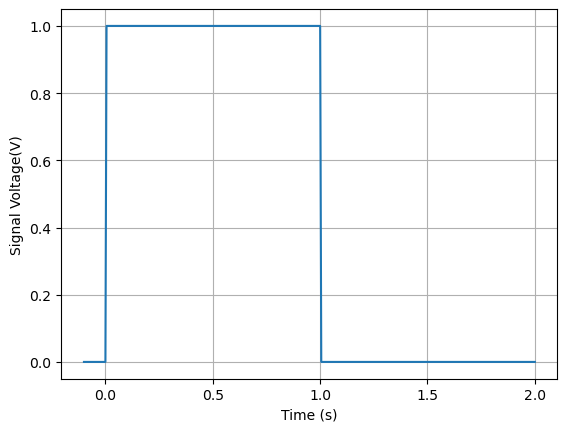

In [4]:
ht=H(t, causal=True)
ht.plot(tv,ylabel='Signal Voltage(V)')

## Bonus
Is this system really in control?  $H(s)=\frac{1}{s}+\frac{1}{s}e^{-s}$ if s=0 then H(s) should go to infinity, so there is a pole at 0, so it should be out of control.  Still how does $e^{-s}$ affect things?  We can approximate $e^{-s} \approx \frac{24}{s^4+4s^3+12s^2+24s+24}$ (This looks like a low pass filter BTW)  [Link to deriviation of delay approximation](https://lpsa.swarthmore.edu/BackGround/TimeDelay/TimeDelay.html)


In [5]:
from sympy import *
a=1
Delay=1/(1+a*s/factorial(1)+(a*s)**2/factorial(2)+(a*s)**3/factorial(3)+(a*s)**4/factorial(4)).normal()
Delay

              24             
─────────────────────────────
 4      3       2            
s  + 4⋅s  + 12⋅s  + 24⋅s + 24

In [6]:
H=transfer(1/s-1/s*Delay).simplify()
H

     3      2                
    s  + 4⋅s  + 12⋅s + 24    
─────────────────────────────
 4      3       2            
s  + 4⋅s  + 12⋅s  + 24⋅s + 24

We can see that H(s) when we approximate  a delay is normal polynomial.  It is hard to see if all the poles are in the left hand plane by inspection when the order of the system is greater than two, so we need to see the pole-zero plot.

<Axes: xlabel='Re(s)', ylabel='Im(s)'>

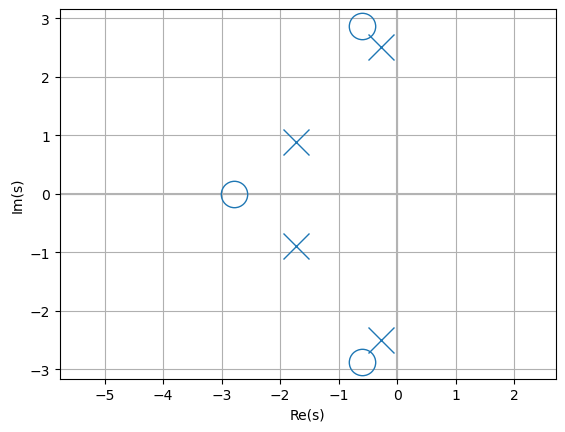

In [7]:
H.plot()

We can see that all the poles are in the left hand plane, so the system seems to be in control.  THe poles are complex and the one zero is real and one pair of zeros is complex.

(<Axes: xlabel='$\\omega (r/s)$', ylabel='Magnitude(dB)'>,
 <Axes: xlabel='$\\omega (r/s)$', ylabel='Transfer function phase (radians)'>)

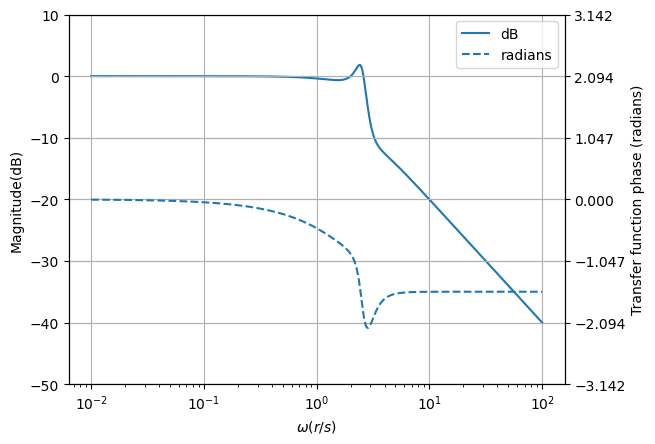

In [8]:
A = H.subs(j * f)
fv = np.logspace(-2, 2, 400)
A.plot(fv, log_frequency=True,ylabel="Magnitude(dB)",xlabel='$\omega (r/s)$')

THe bode plot appears to be a low pass filter that has complex roots do to the resonant peak near 3r/s. We should see some "ringing" in the step response. (oscillations)

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

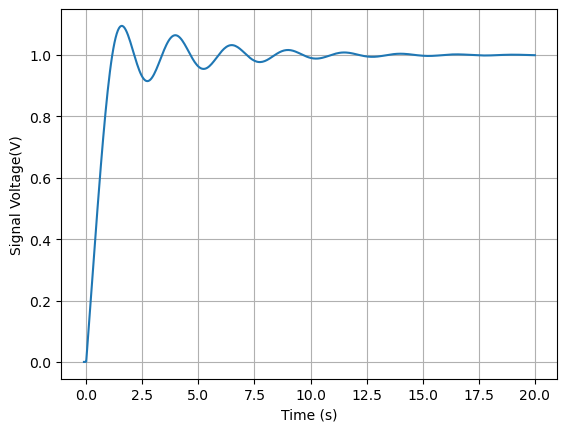

In [9]:
tv = np.linspace(-.1, 20, 400)
G=1/s 
F=H*G
ft=F(t, causal=True)
ft.plot(tv,ylabel='Signal Voltage(V)')

The step response takes around 20 seconds to stop oscillating, but it is settling to a constant value, so it is in control.

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

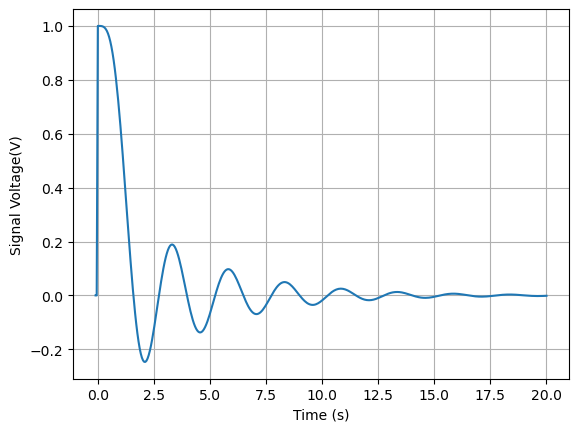

In [10]:
ht=H(t, causal=True)
ht.plot(tv,ylabel='Signal Voltage(V)')

The impulse response settles to a constant value as well, indicating it is in control.